In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/funduss-oct/testA/testA/f-w-ICG-4539-l.jpg
/kaggle/input/funduss-oct/testA/testA/f-d-27662-r.jpg
/kaggle/input/funduss-oct/testA/testA/f-p-ICG-4207-r.jpg
/kaggle/input/funduss-oct/testA/testA/f-h-203890_32.jpg
/kaggle/input/funduss-oct/testA/testA/f-w-43375448.jpg
/kaggle/input/funduss-oct/testA/testA/f-w-ICG-4299-r.jpg
/kaggle/input/funduss-oct/testA/testA/f-w-ICG-5205-r.jpg
/kaggle/input/funduss-oct/testA/testA/f-h-186662_32.jpg
/kaggle/input/funduss-oct/testA/testA/f-w-ICG-5051-l.jpg
/kaggle/input/funduss-oct/testA/testA/f-w-43997302-r.jpg
/kaggle/input/funduss-oct/testA/testA/f-h-203961_32.jpg
/kaggle/input/funduss-oct/testA/testA/f-p-ICG-3948-l.jpg
/kaggle/input/funduss-oct/testA/testA/f-p-ICG-4432-l.jpg
/kaggle/input/funduss-oct/testA/testA/f-h-59512_32.jpg
/kaggle/input/funduss-oct/testA/testA/f-p-ICG-4647-r.jpg
/kaggle/input/funduss-oct/testA/testA/f-w-C875958.jpg
/kaggle/input/funduss-oct/testA/testA/f-h-94501_32.jpg
/kaggle/input/funduss-oct/testA/testA/f-w-4323

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

In [3]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )


    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [4]:
model=Autoencoder()
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [5]:
trainA = ImageFolder('/kaggle/input/funduss-oct/trainA', transform=transform)
testA = ImageFolder('/kaggle/input/funduss-oct/testA', transform=transform)

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=trainA, 
                                           batch_size=128, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=testA, 
                                          batch_size=128)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cpu


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): Sigmoid()
  )
)

In [8]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
num_epochs = 100
for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.to(device)
        optimizer.zero_grad()
        output = model(img)
        loss = criterion(output, img)
        loss.backward()
        optimizer.step()
    if epoch % 5== 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [1/100], Loss: 0.1416
Epoch [6/100], Loss: 0.0856
Epoch [11/100], Loss: 0.0468
Epoch [16/100], Loss: 0.0164
Epoch [21/100], Loss: 0.0067
Epoch [26/100], Loss: 0.0047
Epoch [31/100], Loss: 0.0042
Epoch [36/100], Loss: 0.0032
Epoch [41/100], Loss: 0.0033
Epoch [46/100], Loss: 0.0030
Epoch [51/100], Loss: 0.0030
Epoch [56/100], Loss: 0.0026
Epoch [61/100], Loss: 0.0026
Epoch [66/100], Loss: 0.0023
Epoch [71/100], Loss: 0.0024
Epoch [76/100], Loss: 0.0024
Epoch [81/100], Loss: 0.0022
Epoch [86/100], Loss: 0.0020
Epoch [91/100], Loss: 0.0019
Epoch [96/100], Loss: 0.0019


In [10]:
torch.save(model.state_dict(), 'conv_autoencoder.pth')

<Figure size 1600x1200 with 0 Axes>

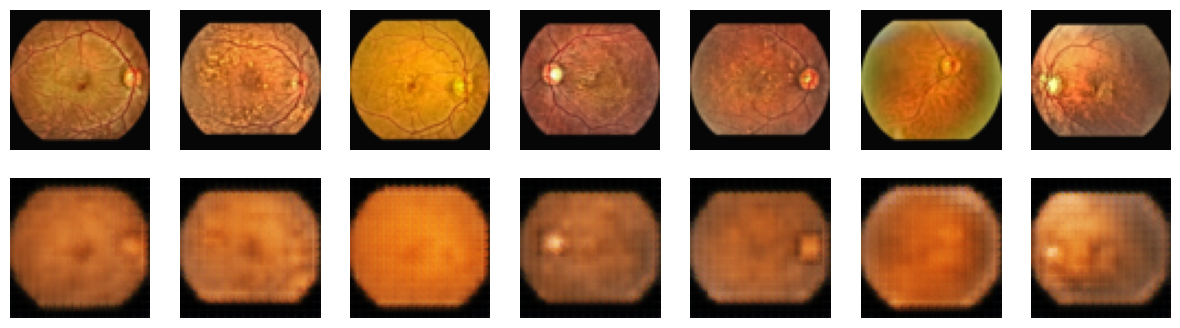

In [12]:
with torch.no_grad():
    for data, _ in test_loader:
        data = data.to(device)
        recon = model(data)
        break
        
import matplotlib.pyplot as plt
plt.figure(dpi=250)
fig, ax = plt.subplots(2, 7, figsize=(15, 4))
for i in range(7):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
plt.show()